<a href="https://colab.research.google.com/github/24523156-prog/klasifikasi-tingkat-stres-mahasiswa/blob/main/klasifikasi_tingkat_stres_mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Nama Kelompok: Berdua
###Anggota Kelompok:
- Aufa Dhia Arkan(24523156)
- Muh. Fajar Rayhan Linta(24523117)

#Studi Kasus
Studi kasus pada penelitian ini adalah klasifikasi tingkat stres mahasiswa berdasarkan faktor akademik, kesehatan, dan lingkungan. Mahasiswa sering mengalami tekanan akibat beban studi, hubungan sosial, serta kondisi kesehatan mental dan fisik. Namun, tingkat stres setiap mahasiswa berbeda-beda dan sulit diidentifikasi secara cepat.

Dengan memanfaatkan dataset yang berisi informasi seperti tingkat kecemasan, kualitas tidur, tekanan akademik, dukungan sosial, dan perundungan, model machine learning dengan metode Logistic Regression digunakan untuk memprediksi tingkat stres mahasiswa ke dalam tiga kategori, yaitu stres rendah, sedang, dan tinggi. Hasil prediksi ini diharapkan dapat membantu pihak kampus atau individu dalam melakukan pemantauan dini terhadap kondisi stres dan menentukan langkah penanganan yang tepat.

#1️⃣ Import Library

###Penjelasan:
Library yang digunakan berfungsi untuk:

- pandas & numpy: pengolahan data

- matplotlib & seaborn: visualisasi data

- sklearn: pembuatan dan evaluasi model machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#2️⃣ Load Dataset

Penjelasan:
Dataset StressLevelDataset.csv dimuat ke dalam DataFrame agar mudah dianalisis dan diproses.

In [2]:
# Load dataset CSV
df = pd.read_csv('StressLevelDataset.csv')

# Simpan ke format pickle
df.to_pickle('StressLevelDataset.pkl')

In [3]:
# Load dataset dari pickle
df = pd.read_pickle('StressLevelDataset.pkl')

df


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


#3️⃣ Eksplorasi Data

Penjelasan:
Tahap ini bertujuan untuk memahami struktur data, tipe data tiap kolom, serta memastikan tidak ada nilai kosong (missing value).

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


Dataset yang digunakan memiliki 1100 data dengan 21 kolom, yang seluruhnya bertipe integer (int64). Hal ini menunjukkan bahwa data sudah dalam bentuk numerik sehingga tidak memerlukan proses encoding tambahan sebelum digunakan dalam pemodelan machine learning. Seluruh kolom memiliki jumlah data yang lengkap (1100 non-null), sehingga tidak terdapat missing value pada dataset ini.

Fitur-fitur dalam dataset mencakup berbagai faktor yang berkaitan dengan kondisi fisik, mental, dan lingkungan, seperti tingkat kecemasan, kualitas tidur, tekanan akademik, dukungan sosial, hingga perundungan. Kolom stress_level digunakan sebagai variabel target, sedangkan 20 kolom lainnya berperan sebagai fitur input. Kondisi dataset yang lengkap dan bersih ini mendukung proses pelatihan model klasifikasi secara optimal tanpa memerlukan penanganan data kosong.

#4️⃣ Visualisasi Distribusi Target

Penjelasan:
Visualisasi digunakan untuk melihat distribusi tingkat stres pada dataset, apakah data seimbang atau tidak.

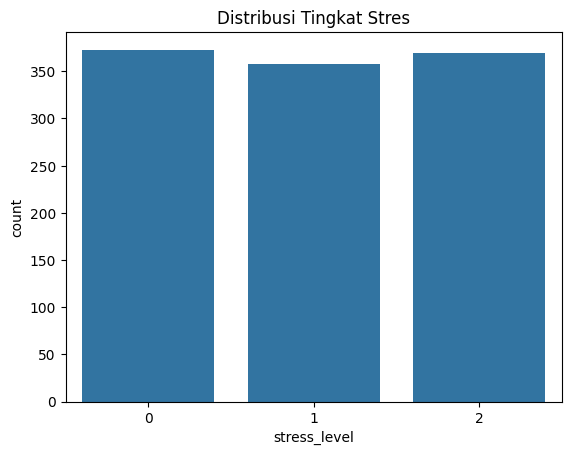

In [5]:
target_col = df.columns[-1]

plt.figure()
sns.countplot(x=target_col, data=df)
plt.title('Distribusi Tingkat Stres')
plt.show()


Grafik menunjukkan distribusi tingkat stres pada dataset yang terbagi ke dalam tiga kelas, yaitu 0, 1, dan 2. Setiap batang merepresentasikan jumlah data pada masing-masing tingkat stres. Terlihat bahwa jumlah data pada ketiga kelas relatif seimbang, sehingga dataset tidak mengalami ketidakseimbangan kelas yang signifikan. Kondisi ini baik untuk proses pelatihan model klasifikasi karena model tidak bias terhadap salah satu kelas tertentu.

#5️⃣ Encoding Data Kategorikal

Penjelasan:
Machine Learning hanya dapat memproses data numerik.
Oleh karena itu, data bertipe teks (kategori) diubah menjadi angka menggunakan LabelEncoder.

In [6]:
encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])


#6️⃣ Pemisahan Fitur dan Target

###Penjelasan:

- X berisi seluruh fitur (variabel input)

- y berisi label target yaitu tingkat stres

In [7]:
target_col = df.columns[-1]

X = df.drop(target_col, axis=1)
y = df[target_col]


#7️⃣ Pemilihan Metode Machine Learning & Pelatihan Model

###Penjelasan:
Metode Logistic Regression digunakan untuk membangun model klasifikasi yang bertujuan memprediksi tingkat stres berdasarkan beberapa fitur input. Metode ini menghitung probabilitas suatu data masuk ke kelas tertentu dan kemudian menentukan kelas dengan probabilitas tertinggi.

Logistic Regression dipilih sebagai metode machine learning karena sesuai untuk permasalahan klasifikasi. Model dilatih menggunakan data training agar dapat mempelajari hubungan antara fitur input dan tingkat stres.

Data dibagi menjadi:

- 80% data latih (training)

- 20% data uji (testing)

Pembagian ini bertujuan agar model dapat diuji pada data yang belum pernah dilihat sebelumnya.


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



#8️⃣ Normalisasi Data

Penjelasan:
Normalisasi diperlukan agar semua fitur memiliki skala yang sama sehingga proses pelatihan model menjadi lebih optimal.

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#9️⃣ Training Model Logistic Regression

Penjelasan:
Logistic Regression digunakan sebagai algoritma klasifikasi untuk memprediksi tingkat stres berdasarkan fitur yang ada.

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#🔟 Prediksi dan Evaluasi Model

Penjelasan:
Model diuji menggunakan data testing dan dievaluasi menggunakan beberapa metrik klasifikasi.

In [11]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


Accuracy: 0.8818181818181818
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        76
           1       0.88      0.88      0.88        73
           2       0.91      0.90      0.91        71

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



##Penjelasan
Model menghasilkan akurasi sebesar 88%, yang menunjukkan bahwa sebagian besar data uji berhasil diklasifikasikan dengan benar. Nilai precision, recall, dan F1-score pada setiap kelas berada di kisaran 0,86–0,91, menandakan performa model yang konsisten dan seimbang dalam mengklasifikasikan tingkat stres rendah, sedang, dan tinggi.

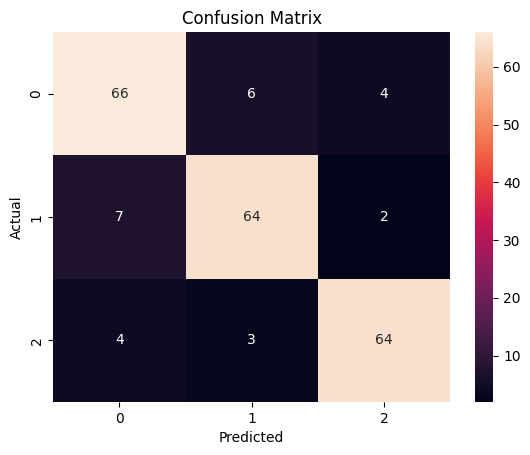

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##Penjelasan
Confusion matrix menunjukkan kinerja model dalam mengklasifikasikan tingkat stres ke dalam tiga kelas (0 = stres rendah, 1 = stres sedang, 2 = stres tinggi). Nilai pada diagonal utama (66, 64, dan 64) menunjukkan jumlah prediksi yang benar untuk masing-masing kelas. Hal ini menandakan bahwa model mampu mengenali setiap tingkat stres dengan cukup baik.

Kesalahan prediksi relatif kecil dan terjadi antar kelas yang berdekatan, misalnya stres rendah yang diprediksi sebagai stres sedang, atau stres sedang yang diprediksi sebagai stres tinggi. Hal ini wajar karena karakteristik antar tingkat stres memiliki kemiripan. Secara keseluruhan, confusion matrix ini menunjukkan bahwa model memiliki performa yang cukup baik dan seimbang dalam mengklasifikasikan tingkat stres.

#Kesimpulan

Model Logistic Regression mampu mengklasifikasikan tingkat stres dengan performa yang cukup baik. Model ini dapat digunakan sebagai sistem pendukung untuk memantau kondisi stres seseorang dan masih dapat dikembangkan menggunakan algoritma lain atau fitur tambahan.

In [13]:
!pip install gradio

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import gradio as gr

# Load dataset
df = pd.read_csv("StressLevelDataset.csv")

# Pilih fitur
features = ['anxiety_level', 'sleep_quality', 'study_load', 'social_support']
X = df[features]
y = df['stress_level']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# ----------- PREDIKSI + TAMPILAN -------------
def predict_stress(anxiety_level, sleep_quality, study_load, social_support):

    data = np.array([[anxiety_level, sleep_quality, study_load, social_support]])
    data = scaler.transform(data)

    probs = model.predict_proba(data)[0]

    # default
    pred = np.argmax(probs)

    # threshold agar stres tinggi lebih sensitif
    if probs[2] >= 0.40:
        pred = 2
    elif probs[1] >= 0.40:
        pred = 1
    else:
        pred = 0

    # label & warna
    labels = {
        0: ("Stres Rendah", "#2ecc71"),
        1: ("Stres Sedang", "#f1c40f"),
        2: ("Stres Tinggi", "#e74c3c")
    }

    text, color = labels[pred]

    html = f"""
    <div style='padding:20px;border-radius:15px;background:#111827;color:white'>
        <h2 style='text-align:center;'>Hasil Prediksi Tingkat Stres</h2>
        <div style='padding:10px;margin:10px;border-radius:12px;text-align:center;
                    font-size:22px;background:{color};color:black;'>
            <b>{text}</b>
        </div>

        <h3>Probabilitas Tiap Kategori</h3>
        <table style='width:100%;border-collapse:collapse;'>
            <tr>
                <th>Stres Rendah</th>
                <th>Stres Sedang</th>
                <th>Stres Tinggi</th>
            </tr>
            <tr>
                <td style='text-align:center'>{probs[0]:.3f}</td>
                <td style='text-align:center'>{probs[1]:.3f}</td>
                <td style='text-align:center'>{probs[2]:.3f}</td>
            </tr>
        </table>
    </div>
    """

    return html


# -------- GRADIO UI ----------
interface = gr.Interface(
    fn=predict_stress,
    inputs=[
        gr.Slider(0, 10, step=1, label="Tingkat Kecemasan"),
        gr.Slider(0, 10, step=1, label="Kualitas Tidur"),
        gr.Slider(0, 10, step=1, label="Beban Belajar"),
        gr.Slider(0, 10, step=1, label="Dukungan Sosial")
    ],
    outputs=gr.HTML(),
    title="Prediksi Tingkat Stres Mahasiswa",
    description="Masukkan nilai 0–10 pada setiap faktor berikut untuk memprediksi tingkat stres."
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f6bb113c86a6bebc32.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
